<a href="https://colab.research.google.com/github/robert-myers/myanimelist-recommender/blob/master/notebooks/show_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install jikanpy && pip install surprise

In [0]:
import dill as pickle
import urllib.request

from jikanpy import Jikan
from PIL import Image

In [0]:
jikan = Jikan()

In [4]:
%%time
with open('/content/drive/My Drive/jars/recommender.pickle', 'rb') as f:
  malr = pickle.load(f)

CPU times: user 1min 26s, sys: 11 s, total: 1min 37s
Wall time: 1min 38s


In [0]:
def show_me(user, randomize=False, filter_completed=True):
  if randomize:
    recommendations = malr.get_recommendations(user, num_titles=20, filter_completed=filter_completed)
    url = recommendations.sample()["image_url"].iloc[0]
  else:
    url = malr.get_recommendations(user, num_titles=1, filter_completed=filter_completed)["image_url"].iloc[0]
  image = Image.open(urllib.request.urlopen((url)))
  return image

In [0]:
lawrence_recommendations = malr.get_recommendations("LawrenceOfArabia").reset_index()

In [0]:
lawrence_recommendations["image_url"] = lawrence_recommendations["image_url"].apply(lambda x: Image.open(urllib.request.urlopen((x))))

In [8]:
!mkdir tmp

mkdir: cannot create directory ‘tmp’: File exists


In [0]:
for i, image in enumerate(lawrence_recommendations["image_url"]):
  image.save(f"tmp/thumbnail_{i}.png")

In [10]:
lawrence_recommendations[["title"]]

,title
0,Kimi no Na wa.
1,Fullmetal Alchemist: Brotherhood
2,Steins;Gate
3,Death Note
4,Sen to Chihiro no Kamikakushi
5,Clannad: After Story
6,Hunter x Hunter (2011)
7,Koe no Katachi
8,Code Geass: Hangyaku no Lelouch R2
9,Code Geass: Hangyaku no Lelouch


Kimi no Na wa.


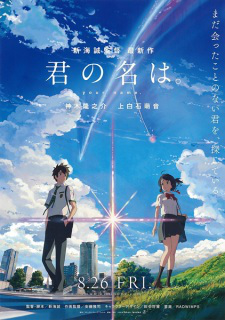

In [11]:
print(lawrence_recommendations.loc[0]["title"])
lawrence_recommendations.loc[0]["image_url"]

Fullmetal Alchemist: Brotherhood


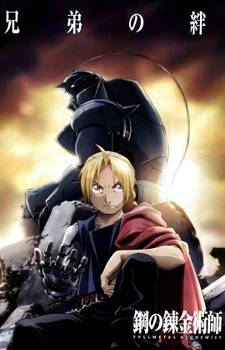

In [12]:
print(lawrence_recommendations.loc[1]["title"])
lawrence_recommendations.loc[1]["image_url"]

Steins;Gate


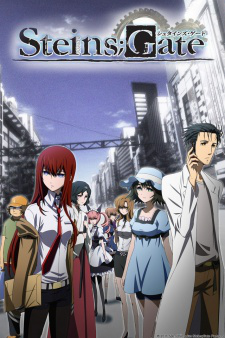

In [13]:
print(lawrence_recommendations.loc[2]["title"])
lawrence_recommendations.loc[2]["image_url"]

Death Note


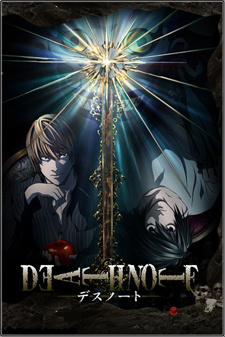

In [14]:
print(lawrence_recommendations.loc[3]["title"])
lawrence_recommendations.loc[3]["image_url"]

Sen to Chihiro no Kamikakushi


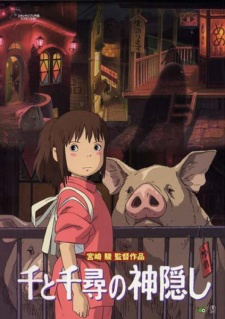

In [15]:
print(lawrence_recommendations.loc[4]["title"])
lawrence_recommendations.loc[4]["image_url"]

Clannad: After Story


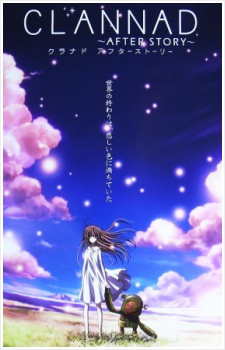

In [16]:
print(lawrence_recommendations.loc[5]["title"])
lawrence_recommendations.loc[5]["image_url"]

Hunter x Hunter (2011)


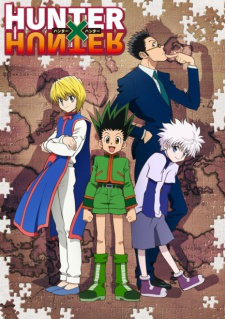

In [17]:
print(lawrence_recommendations.loc[6]["title"])
lawrence_recommendations.loc[6]["image_url"]

Koe no Katachi


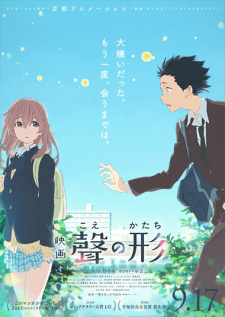

In [18]:
print(lawrence_recommendations.loc[7]["title"])
lawrence_recommendations.loc[7]["image_url"]

Code Geass: Hangyaku no Lelouch R2


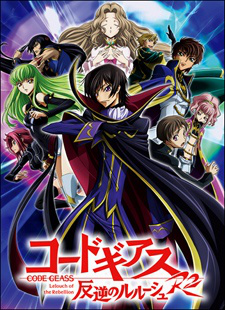

In [19]:
print(lawrence_recommendations.loc[8]["title"])
lawrence_recommendations.loc[8]["image_url"]

Code Geass: Hangyaku no Lelouch


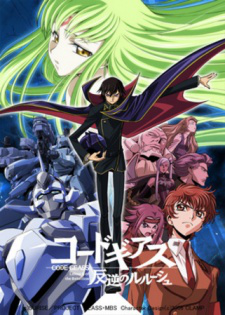

In [20]:
print(lawrence_recommendations.loc[9]["title"])
lawrence_recommendations.loc[9]["image_url"]